# Tabular Playground Series - Apr 2021

In [121]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Context

In [122]:
df = pd.read_csv('data\\train.csv')
print('Number Of Observations:', df.shape[0])
print('Number Of Features:', df.shape[1])

Number Of Observations: 100000
Number Of Features: 12


In [123]:
df.head().append(df.tail())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S
99999,99999,0,3,"Enciso, Tyler",male,55.00,0,0,458074,13.96,NaN,S


The data set consists of 12 features: there are both categorical and continuous data. Target variable is **Survived** (binary). The following features are uninformative **PassengerId, Name, Ticket**, so these columns will be deleted.  

We can also observe that the dataset has missing values in the Cabin and Ticket columns.


## Data quality assessment

In [124]:
# remove uninformative columns
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

# dataframe columns preprocessing 
df.columns = df.columns.str.lower()

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   survived  100000 non-null  int64  
 1   pclass    100000 non-null  int64  
 2   sex       100000 non-null  object 
 3   age       96708 non-null   float64
 4   sibsp     100000 non-null  int64  
 5   parch     100000 non-null  int64  
 6   fare      99866 non-null   float64
 7   cabin     32134 non-null   object 
 8   embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 6.9+ MB


We see that the categorical data needs to be converted to the appropriate data type **("category")**. 

### Processing categorical features

In [126]:
categotical_feature_columns = ['sex', 'embarked', 'pclass', 'survived']

for col in categotical_feature_columns:
    print('Dataset column: {}'.format(col))
    print('Number of unique values: {}'.format(df[col].nunique()))
    print('Unique values: {}\n'.format(df[col].unique()))

df[['sex', 'embarked']] = df[['sex', 'embarked']].astype('category')

Dataset column: sex
Number of unique values: 2
Unique values: ['male' 'female']

Dataset column: embarked
Number of unique values: 3
Unique values: ['S' 'C' 'Q' nan]

Dataset column: pclass
Number of unique values: 3
Unique values: [1 3 2]

Dataset column: survived
Number of unique values: 2
Unique values: [1 0]



We see that there are missing values in the **Embarked** column as well. 

### Missing values processing

In [127]:
print('Persentage of missing values:')
df.isnull().sum() / df.shape[0] * 100

Persentage of missing values:


survived     0.000
pclass       0.000
sex          0.000
age          3.292
sibsp        0.000
parch        0.000
fare         0.134
cabin       67.866
embarked     0.250
dtype: float64

We see that the **cabin** column is missing about 67% of the data. Let's delete this column, since it is not informative due to missing values. 

In [128]:
df = df.drop('cabin', axis=1)

About 3% of the missing values in the **age** column. Age is an important factor in determing survival, because kids in general have a better chance of survival and older adults have a lower chance. 

<AxesSubplot:>

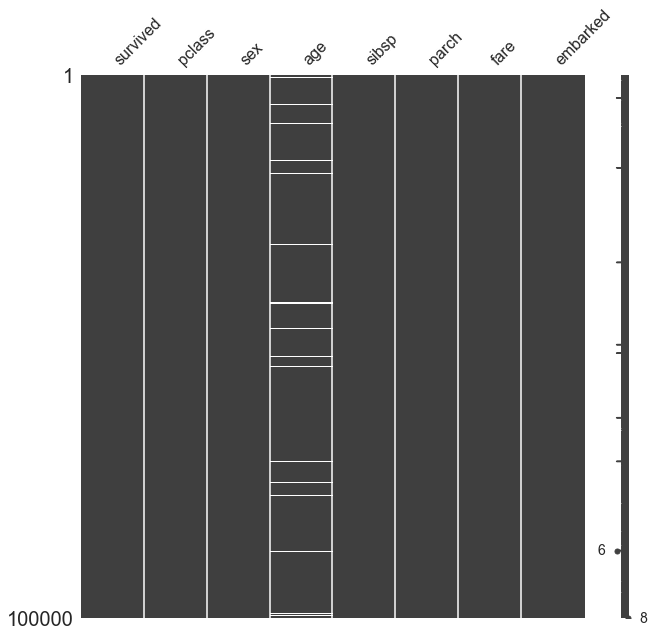

In [129]:
import missingno as msno

msno.matrix(df, figsize=(10, 10))

In [130]:
pd.crosstab([df['sex'], df['pclass']], df['age'].isna())

age            False  True
sex    pclass             
female 1       15602   482
       2       14784   499
       3       12115   404
male   1       13751   480
       2       12947   449
       3       27509   978

There are almost twice as many missing values for males as for females in class 3. Let's fill in the missing values with the average values by **sex** and **pclass**.

In [131]:
df.groupby(['sex', 'pclass'])['age'].mean().round()

sex     pclass
female  1         47.0
        2         39.0
        3         32.0
male    1         42.0
        2         38.0
        3         34.0
Name: age, dtype: float64

In [132]:
# replace values by condition
df.loc[(df['sex'] == 'female') & (df['pclass'] == 1) & df['age'].isna(), 'age'] = 47
df.loc[(df['sex'] == 'female') & (df['pclass'] == 2) & df['age'].isna(), 'age'] = 39
df.loc[(df['sex'] == 'female') & (df['pclass'] == 3) & df['age'].isna(), 'age'] = 32

df.loc[(df['sex'] == 'male') & (df['pclass'] == 1) & df['age'].isna(), 'age'] = 42
df.loc[(df['sex'] == 'male') & (df['pclass'] == 2) & df['age'].isna(), 'age'] = 38
df.loc[(df['sex'] == 'male') & (df['pclass'] == 3) & df['age'].isna(), 'age'] = 34

The remaining missing values in the **fare** and **embarked** columns will be deleted, since there are few missing values in them.

In [133]:
df = df.dropna(axis=0)
df.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

We see that there are missing values in the **Embarked** column as well. 

In [134]:
df = df.dropna(axis=0)
df.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

### Processing Quantitative Features

#### Discrete variables
Discrete variables include **sibsp** and **parch**.

In [135]:
print(df.groupby('sibsp')['sibsp'].size().sort_values(ascending=False))
print('--' * 20)
print(df.groupby('parch')['parch'].size().sort_values(ascending=False))

sibsp
0    73034
1    19662
2     3695
3     1632
4     1166
8      296
5      132
Name: sibsp, dtype: int64
----------------------------------------
parch
0    73279
1    12936
2    11180
3      979
4      444
5      331
9      264
6      204
Name: parch, dtype: int64


Discrete variables have valid values and do not need further processing.  

> Most of the passengers were alone on board. 

#### Continious variables

Continuous variables include **age** and **fare**.

In [136]:
df[['age', 'fare']].describe()

,age,fare
count,99617.000000,99617.000000
mean,38.345062,43.913319
std,18.031625,69.572191
min,0.080000,0.680000
25%,25.000000,10.030000
50%,38.000000,24.450000
75%,53.000000,33.490000
max,87.000000,744.660000


The maximum age value of 87 is acceptable. We see that there is a large gap between the third quartile and the maximum value of fare.

## Data exploration

Titanic had 20 lifeboats, designed for loading 1178 people, but the Titanic had 2208 people in total. So, naturally, there would not be enough boats for everyone, and after the accident with the iceberg, Titanic's captain Smith gave an order to take only **women and children** in the lifeboats. However, crew did not always follow his advice. Sometimes the lifeboats were launched half-empty. Sometimes, if there was free seat in the boat, the crew would allow the men to evacuate.

Based on Captain Smith's command, we expect to see more women and children among the survivors, so the following visualizations will focus on the questions:

  1) How did age and class affect female survival?
  2) What age children had a better chance of surviving, and did the fact that some were on board without their parents have any effect?
  3) What factors did influence the fact that men were taken on lifeboats when seats were available?


### Target variable

<AxesSubplot:ylabel='survived'>

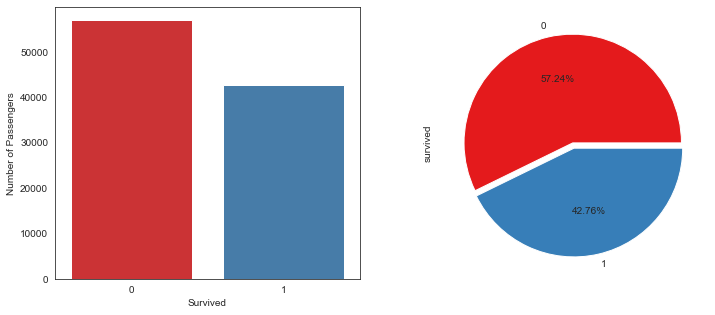

In [137]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='survived', data=df, ax=ax[0])
ax[0].set_xlabel('Survived')
ax[0].set_ylabel('Number of Passengers')

explode = [0, 0.05]
df['survived'].value_counts().plot.pie(ax=ax[1], autopct = '%1.2f%%', explode=explode)

> As we see, about 58% of the people did not survive.

### Correlation

Before constructing visualizations, let's try to highlight the most significant survival factors using correlation.

<AxesSubplot:>

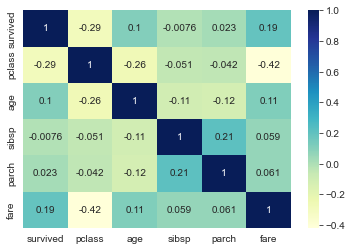

In [138]:
sns.heatmap(df.select_dtypes(np.number).corr(), annot=True, cmap="YlGnBu")

Among the features presented, we can immediately distinguish   
* **pclass**: a negative correlation coefficient means that the lower the class (in this case third class), the less chance of survival;  
* **fare**: the higher was the ticket price, the higher were the chances of survival  
* **age**: age also mattered

### Categorical features

In [139]:
categorical = ['sex', 'pclass', 'embarked']
for col in categorical:
    print(df.groupby(col)[col].size() / df.shape[0] * 100)
    print('--' * 20)

sex
female    43.865003
male      56.134997
Name: sex, dtype: float64
----------------------------------------
pclass
1    30.305068
2    28.677836
3    41.017095
Name: pclass, dtype: float64
----------------------------------------
embarked
C    22.239176
Q     5.436823
S    72.324001
Name: embarked, dtype: float64
----------------------------------------


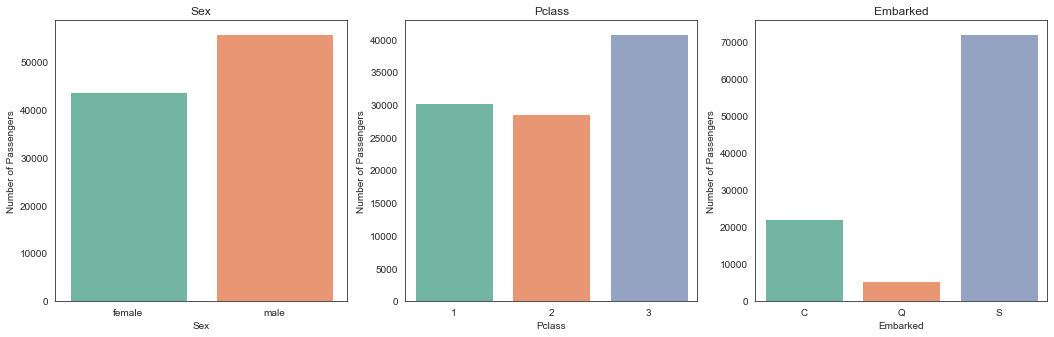

In [140]:
sns.set_palette('Set2')
f, axes = plt.subplots(nrows=1, ncols=len(categorical), figsize=(15, 5))
f.tight_layout(pad=3.0)

for i, col in enumerate(categorical):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col.capitalize())
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Number of Passengers')


> * More than half of the passengers are men.  
> * Most of the passengers traveled in third class, with almost equal numbers of first and second class passengers.
> * Most of the passengers embarked on Southampton.

### Target — Categorical

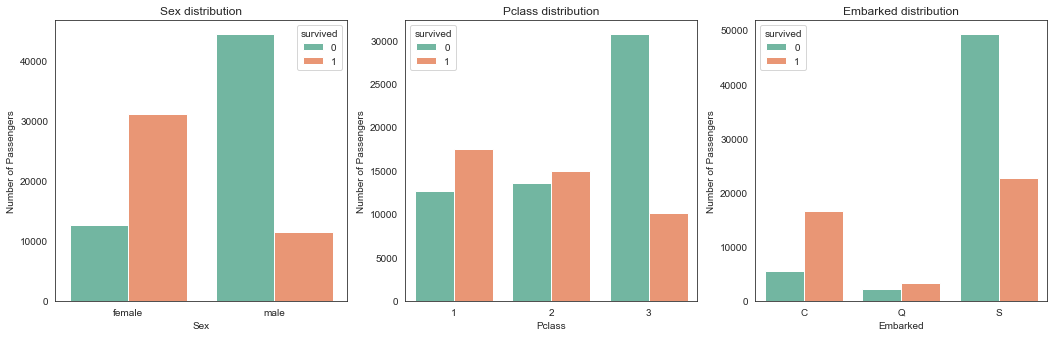

In [141]:
f, axes = plt.subplots(nrows=1, ncols=len(categorical), figsize=(15, 5))
f.tight_layout(pad=3.0)
for i, col in enumerate(categorical):
    sns.countplot(x=col, data=df, ax=axes[i], hue='survived')
    axes[i].set_title('{} distribution'.format(col.capitalize()))
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Number of Passengers')

> * There are more survivors among women than among men. 
> * First class passengers had a better (slightly better) chance of survival than second and third class passengers. The greatest number of deaths was among third-class passengers.  
> * The greatest likelihood of survival was for those who embarked from Southampton.

Text(0.5, 0, 'Port of embarkation')

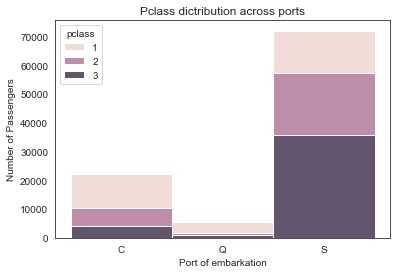

In [142]:
sns.histplot(x='embarked', hue='pclass', data=df, multiple='stack')
plt.title('Pclass dictribution across ports')
plt.ylabel('Number of Passengers')
plt.xlabel('Port of embarkation')

Port of embarkation has no effect on the chances of survival, due to the distribution of passengers of different classes between these ports, as the graph confirms.

In [143]:
pd.crosstab([df['sex'], df['pclass']],
            columns=df['survived']).sort_values(by=1).transpose() / df.shape[0] * 100      

sex            male                         female                      
pclass            3          2         1         3          2          1
survived                                                                
0         25.469548  10.093659  9.015529  5.405704   3.531526   3.728279
1          3.028600   3.307668  5.219993  7.113244  11.744983  12.341267

> As we can see, the gender of the passenger had a stronger influence on survival than the class of the passenger. So women who traveled in first class had a better chance of survival than women in 
> second and third class. However, second and third class women still had a better chance of survival than first class men.
> The greatest number of survivors was among men who traveled first class.

### Quantitative Features

#### Discrite

Let's look at the data for children in the parch column. Although there were marriages at an early age, we will assume that the child did not have children of his own at age 16. 

In [144]:
df[(df['age'] < 16) & (df['parch'] > 2)].sort_values('parch')

,survived,pclass,sex,age,sibsp,parch,fare,embarked
222,0,3,female,12.0,2,3,30.19,C
61301,1,3,female,10.0,1,3,29.23,S
60711,1,1,male,15.0,1,3,201.41,C
59785,0,1,male,9.0,2,3,61.49,S
59460,1,3,male,3.0,0,3,24.49,S
...,...,...,...,...,...,...,...,...
76200,0,3,male,2.0,1,9,10.70,S
30245,0,2,male,10.0,0,9,75.81,S
30174,1,2,female,13.0,2,9,36.04,C
63401,0,3,female,12.0,0,9,30.59,C


We see that in some cases the parch column for a nine-year-old girl shows a value of 9. Therefore, for such cases, we will specify 2 (mom and dad were on board).  

In [145]:
df.loc[(df['age'] <= 16) & (df['parch'] > 2), 'parch'] = 2

Text(566.5454545454544, 0.5, 'Number of Passengers')

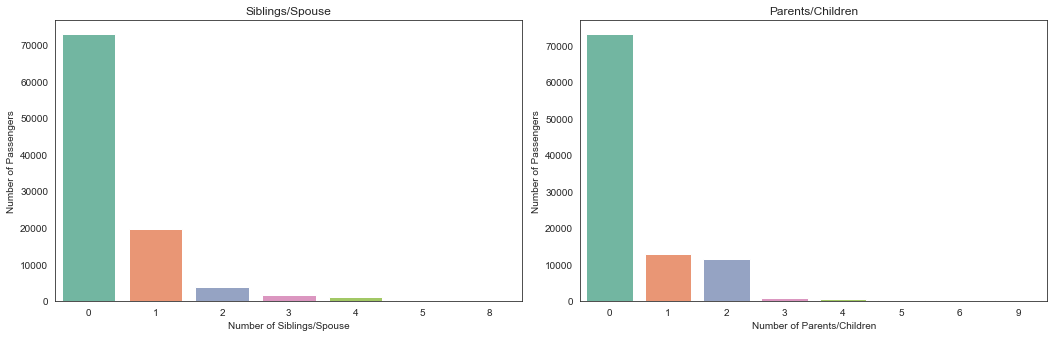

In [146]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
f.tight_layout(pad=3.0)

sns.countplot(x='sibsp', data=df, ax=axes[0])
axes[0].set_title('Siblings/Spouse')
axes[0].set_xlabel('Number of Siblings/Spouse')
axes[0].set_ylabel('Number of Passengers')

sns.countplot(x='parch', data=df, ax=axes[1])
axes[1].set_title('Parents/Children')
axes[1].set_xlabel('Number of Parents/Children')
axes[1].set_ylabel('Number of Passengers')


> As it was mentioned before, most of the passengers traveled alone.

Text(566.5454545454544, 0.5, 'Number of Passengers')

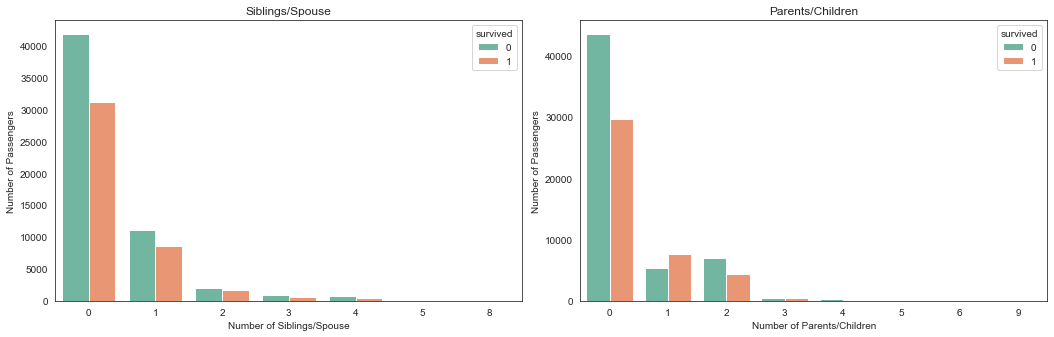

In [147]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
f.tight_layout(pad=3.0)

sns.countplot(x='sibsp', data=df, ax=axes[0], hue='survived')
axes[0].set_title('Siblings/Spouse')
axes[0].set_xlabel('Number of Siblings/Spouse')
axes[0].set_ylabel('Number of Passengers')

sns.countplot(x='parch', data=df, ax=axes[1], hue='survived')
axes[1].set_title('Parents/Children')
axes[1].set_xlabel('Number of Parents/Children')
axes[1].set_ylabel('Number of Passengers')

> * As we can see in the graph, those passengers who traveled either alone or with 1 or 2 siblings/spouses were more likely to survive.
> * The situation was similar for parents/children: small families (up to three people or a person was on board alone) had a better chance of surviving.

#### Did number of parents on the board had affect on children survival?

Text(1.1750000000000043, 0.5, 'Number of Children')

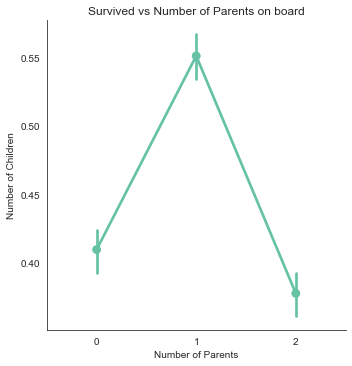

In [148]:
df_children = df[df['age'] <= 16] # get all children from dataset 
sns.catplot(x='parch', y='survived', data=df_children, kind='point')
plt.title('Survived vs Number of Parents on board')
plt.xlabel('Number of Parents')
plt.ylabel('Number of Children')

> As we can see in the graph, children who were on board with one parent had the greatest chance of survival.

#### Continious variables

##### Age

Text(0, 0.5, 'Number of Passengers')

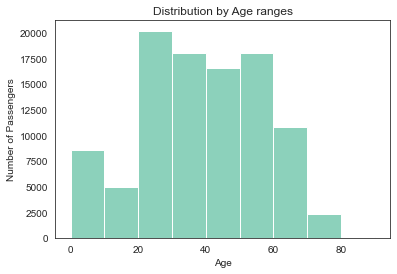

In [149]:
bins = [0,10,20,30,40,50,60,70,80,90]
sns.histplot(df, x='age', bins=bins)
plt.title('Distribution by Age ranges')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')

The distribution of age is slightly right skewed. As we can see, it was mostly people from 20 to 60 years old who were on board the Titanic. There were more children than teenagers. Old people were the least numerous. 

##### Age — Target

Text(0, 0.5, 'Number of Passengers')

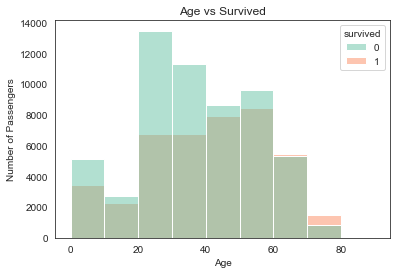

In [150]:
sns.histplot(df, x='age', hue='survived', bins=bins)
plt.title('Age vs Survived')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')

You can see from the graph that, in general, the survival rate among people over 60 is higher than that of people under 20. Is this justified by the fact that most of the elderly traveled higher class?..

We can also see that the greatest number of victims was between the ages from 20 to 40.

In [151]:
print('Ratio of survivors to the total number of passengers by age group')
print('Children (0-16):', round(df[(df['age'] <= 16) & (df['survived'] == 1)].shape[0] / df[df['age'] <= 16].shape[0] * 100, 3))
print('Adult (17-60):', round(df[(df['age'].between(16, 60)) & (df['survived'] == 1)].shape[0] / df[df['age'].between(16, 60)].shape[0] * 100, 3))
print('Elderly people (61-90):', round(df[(df['age'] >= 60) & (df['survived'] == 1)].shape[0] / df[df['age'] >= 60].shape[0] * 100, 3,))

Ratio of survivors to the total number of passengers by age group
Children (0-16): 44.148
Adult (17-60): 40.891
Elderly people (61-90): 52.957


Why is the ratio in surviving children less than in older people? It's all about the distribution of children by class of passenger.

Text(0, 0.5, 'Number of Children')

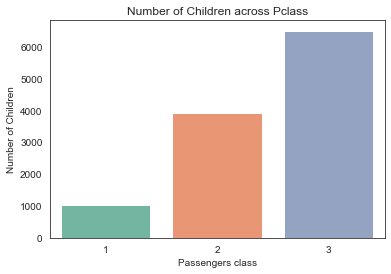

In [152]:
sns.countplot(data=df_children, x='pclass')
plt.title('Number of Children across Pclass')
plt.xlabel('Passengers class')
plt.ylabel('Number of Children')

> Most of the children were in the third class of passengers.

In [153]:
pd.DataFrame(df.groupby('survived')['age'].describe())

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,57025.0,36.711298,17.523639,0.08,24.0,36.0,51.0,83.0
1,42592.0,40.532455,18.465394,0.08,27.0,42.0,55.0,87.0


Judging by the descriptive statistics, the passengers who survived were, on average, slightly older than those who died.

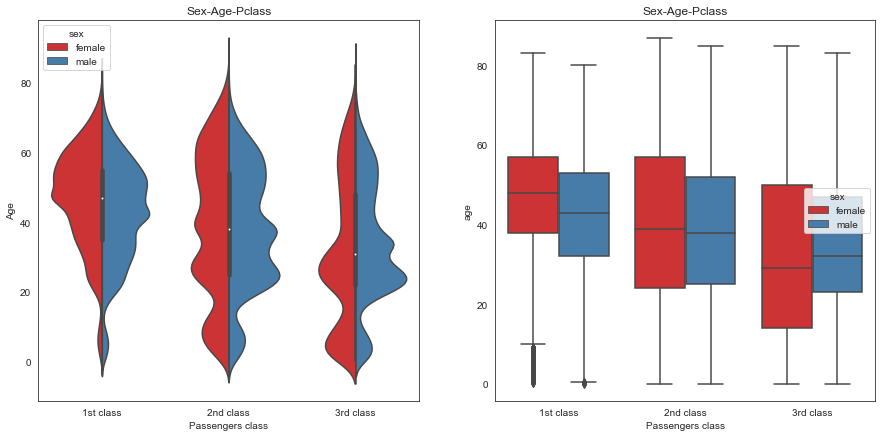

In [154]:
f, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.set_palette('Set1')

sns.violinplot(x='pclass', y='age', hue='sex', data=df, split=True, ax=ax[0])
ax[0].set_ylabel('Age')
ax[0].set_xlabel('Passengers class')
ax[0].set_title('Sex-Age-Pclass')
ax[0].set_xticks(np.arange(3), ['1st class', '2nd class', '3rd class'])

sns.boxplot(x='pclass', y='age', hue='sex', data=df, ax=ax[1])
ax[1].set_xlabel('Passengers class')
ax[1].set_title('Sex-Age-Pclass')
ax[1].set_xticks(np.arange(3), ['1st class', '2nd class', '3rd class'])

In [155]:
pd.DataFrame(df.groupby(['pclass', 'sex'])['age'].describe())

count       mean        std   min   25%   50%   75%   max
pclass sex                                                                
1      female  16008.0  46.993935  14.265232  0.33  38.0  48.0  57.0  83.0
       male    14181.0  42.241445  14.307595  0.08  32.0  43.0  53.0  80.0
2      female  15218.0  39.308871  20.524818  0.08  24.0  39.0  57.0  87.0
       male    13350.0  37.844833  16.939609  0.08  25.0  38.0  52.0  85.0
3      female  12471.0  31.977079  20.908941  0.08  14.0  29.0  50.0  85.0
       male    28389.0  34.037767  16.864353  0.08  23.0  32.0  47.0  83.0

The graphs and summary statistics show that for first- and second-class passengers, the average age of women is slightly higher than the average age of men. 

<AxesSubplot:ylabel='sex'>

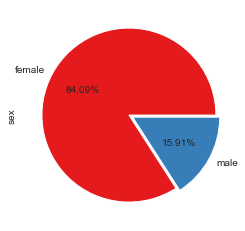

In [156]:
df_survived_eldery_people = df[(df['age'] > 60) & (df['survived']) == 1]

sns.set_style('white')
df_survived_eldery_people['sex'].value_counts().plot.pie(autopct = '%1.2f%%', explode=explode)

On the pie chart we can see that 84% of the survivors are women. 

As we have seen before, there are more survivors than deaths among people over 60. However, this is not reinforced by the fact that old people were allowed into the lifeboats.

Among people over 60, most were first- and second-class passengers, with a high proportion of survivors being women. 

##### Fare

Text(0.5, 1.0, 'Fare distribution')

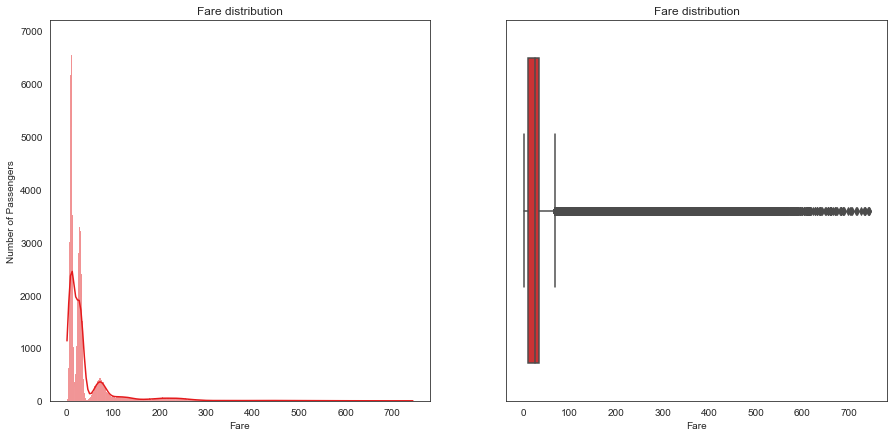

In [157]:
f, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(x='fare', data=df, kde=True, ax=ax[0])
ax[0].set_xlabel('Fare')
ax[0].set_ylabel('Number of Passengers')
ax[0].set_title('Fare distribution')

sns.boxplot(x='fare', data=df, ax=ax[1])
ax[1].set_xlabel('Fare')
ax[1].set_title('Fare distribution')

Distribution is skewed to the right. Most of the data points are spread more densely at the range of approximately 10 to 35 currency unit. 

##### Fare — Target

It has been shown that passenger class is directly related to the likelihood of survival. The price of the ticket is related to the class of the passenger. This is shown by the correlation coefficient. 

In [158]:
print('Correlation between Fare and Pclass: ', df['fare'].corr(df['pclass']))

Correlation between Fare and Pclass:  -0.41723350980648444


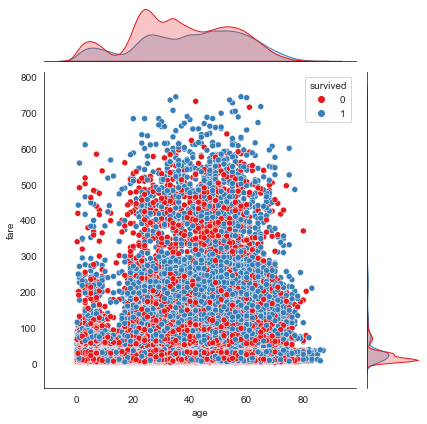

In [159]:
sns.jointplot(x='age', y='fare', hue='survived', data=df)

The graph shows that there are far fewer fatalities among passengers who paid a lot of money for a ticket. More clearly, this can be seen in the graph. Let's take the third quartile + 1.5 * IQR as a boundary value.

<AxesSubplot:ylabel='survived'>

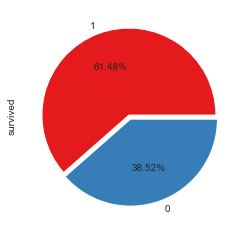

In [160]:
Q1, Q3 = np.percentile(df['fare'], [25, 75])
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
df_fare_upper_bound = df[(df['fare'] >= upper_bound)]

sns.set_style('white')
df_fare_upper_bound['survived'].value_counts().plot.pie(autopct = '%1.2f%%', explode=explode)

> More than 60% of passengers survived.

### **NOTE**: Cabin 

For objective analysis, more than 60 percent of the missing values could not give a complete picture of what was going on.Therefore, the column was removed from the dataset. 

But to understand what is happening and in particular to understand why there are more first class passengers among the survivors, let's look at the scheme of the Titanic.

<img src="schema_titanic.jpg" width="450" />

The infrastructure for first class passengers was on the upper levels of the Titanic, hence they heard the news of the collision with the iceberg before anyone else and could get to the evacuation point quicker.

## Summary

Captain Smith's order was carried out: there were more women and children among the survivors.

With the help of EDA I was able to find out that the most significant survival factors were **Sex** (more important) and **Pclass**. And the high survival rate among 1st and 2nd class passengers is due to the fact that these people were closer to the evacuation zone at the time of the accident. 

**More data insights:**

* **Children**. Children (44%) actually had a better chance of survival than adults (40%). However, pclass also mattered for the child as much as for the adult. It has been observed that children who were on board with one parent had a better chance of survival. 
* **Men**. Unfortunately for men, only the pclass mattered: closeness to the evacuation zone. 
* **Port of Emabarkation**. It has been shown that the distribution of survivors by port is related to the distribution of classes of passengers who boarded at a particular port. So, this feature is less important, than passengers class.
* **Fare**. Cost of the ticket was realated to passengers class.
* **Number of family members**. Members of families where the number of people was more than 3 were less likely to survive. 

Thus, the success of rescue from the Titanic depended on the ***gender of the passenger***, whether the ***passenger was a child***, and his ***closeness*** ***to the evacuation zone*** at the time of the disaster.